# Lab: Multiple Testing




## Review of Hypothesis Tests

We begin by performing some one-sample  $t$-tests.
 First we create 100 variables, each consisting of 10 observations. The first 50 variables have mean $0.5$ and variance $1$,
while the others have mean $0$ and variance $1$.

In [12]:
import numpy as  np

from scipy.stats import norm
mu1 =.5
mu2 =0
X1 = norm(mu1, 1)# 
X2 = norm(mu2, 1)


nSamples=50;
Xs =  [ [0]*nSamples for i in range(100)]
for i in range(50):
    Xs[i] = X1.rvs(nSamples);

for i in range(50, 100):
    Xs[i] = X2.rvs(nSamples);
    


The `ttest_1samp` function can perform a one-sample or a two-sample $t$-test.
 By default, a  one-sample test is performed. To begin, we test $H_{0}: \mu_1=0$, the null hypothesis that the first variable has mean zero.


We now test $H_{0j}: \mu_j=0$ for $j=1,\ldots,100$. We compute the 100
 $p$-values, and then construct a vector recording whether the $j$th $p$-value is less than or equal to 0.05, in which case we reject $H_{0j}$,
 or greater than 0.05, in which case we do not reject $H_{0j}$, for $j=1,\ldots,100$.

In [13]:
import scipy as sc


pvals =[0]*100
for i in range(100):
    res =sc.stats.ttest_1samp(Xs[i], 0)
    pvals[i] =res.pvalue
#pvals

Since this is a simulated data set, we can create a $2 \times 2$ table with type I and type II errors

In [14]:
import pandas as pd

rej = [p<0.05 for p in pvals]
truenull =[*[True]*50, *[False]*50]
df = pd.DataFrame({'H0_rej':rej, 'H0_true':truenull})
ct = pd.crosstab(df['H0_rej'], df['H0_true'])

#c
#print(rej, truenull)
print(ct)

H0_true  False  True 
H0_rej               
False       49      5
True         1     45


## The Family-Wise Error Rate
Recall from (13.5) that if the null hypothesis is true for each of $m$ independent hypothesis tests, then the
  FWER is equal to $1-(1-\alpha)^m$. We can use this expression to compute the FWER for $m=1,\ldots, 500$ and $\alpha=0.05$, $0.01$, and $0.001$.

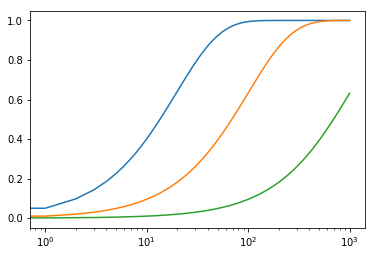

In [16]:
ms  = [i for i in range(1000)]
fwe1 = [1 - (1 - 0.05)**m for m in ms]
fwe2 = [1 - (1 - 0.01)**m for m in ms]
fwe3 = [1 - (1 - 0.001)**m for m in ms]

import matplotlib.pyplot as plt

plt.xscale('log')
plt.plot(ms, fwe1)
plt.plot(ms, fwe2)
plt.plot(ms, fwe3)



 As discussed previously, even for moderate values of $m$ such as $50$, the FWER exceeds $0.05$ unless $\alpha$ is set to a very low value,
  such as $0.001$.
Of course,
 the problem with setting $\alpha$ to such a low value is that we are likely to make a number of Type II errors: in other words, our power is very low.


We now conduct a one-sample $t$-test for each of the first five managers in the `Fund` dataset,
  in order to test the null hypothesis that the $j$th fund manager's mean return equals zero,
$H_{0j}: \mu_j=0$.

In [17]:
# load the fund manager 

import pandas as pd

df = pd.read_csv('fund.csv')
cols = df.columns
cols = cols[1:len(cols)] # remove the first pseudocolumn
pvals = [0]*len(cols)
rej =[False]*len(cols)
i=0;
for col in cols:
   # print(col)
    res =sc.stats.ttest_1samp(df[col], 0)
    pvals[i] =res.pvalue
    print(pvals[i])
    i = i+1



0.0062023554855382464
0.9182711516514123
0.011600982682500436
0.6005396008061651
0.7557815084668168
0.0009645725984591884
0.004651524304645147
0.001397802525898444
0.002604065138148157
0.0027967384364455815
0.004158511749701586
0.0008289489860180706
0.0014976114814635275
0.004344393627252454
0.001412227754481132
0.002010751144262038
0.004429684591013953
0.001779446016298605
0.0031207877141423397
0.004046957766404363
0.0037092712824233045
0.004859143934445459
0.0029422761138993875
0.0017559581063687605
0.004545360269257807
0.003109976502601077
0.004870545180747305
0.004282888746820378
0.0023673505627084595
0.0033862285059876778
0.003268039177637533
0.003944492794107612
0.004106741790892569
0.0030705571942962733
0.002204254264943292
0.002677713332232068
0.003441358570707988
0.0022951805766206292
0.0013968741404823946
0.003358092289417977
0.0011027137376367977
0.0018724464764818677
0.002150929797207933
0.004186179328244167
0.0027493306936230565
0.0037781737826298747
0.0037235456681810556


0.9532940052270142
0.1223419583573918
0.7109423879398034
0.945756403041538
0.692340112019064
0.2123142787687971
0.9582371575859217
0.45471771375266234
0.09344628547160212
0.42649805508223226
0.07312251230585703
0.5852819059314821
0.4191481597954295
0.41986279879191335
0.8444948385465259
0.7459537173107672
0.6344693735881273
0.18151247191094536
0.38824733244810505
0.23866042455590541
0.7846683572215428
0.23984025358293232
0.5026161461791252
0.06710110357836768
0.7478438831374843
0.06772609339571409
0.4397945854329246
0.20539401359334916
0.11525007195112405
0.6256183934361932
0.2637867687085841
0.2678178644582238
0.32744871444048396
0.5884287403900166
0.5954078397380254
0.7567023917245759
0.8130773386556167
0.6607228471956317
0.26100444422758295
0.748724629071426
0.8851067654732365
0.14992017462194637
0.6728432487916559
0.033533899843866156
0.02003699695964831
0.2998759818431708
0.20763729597548183
0.33761802495380866
0.2682329914825443
0.23030590878127466
0.8130922607731594
0.6422067603

0.46557568208956324
0.909415317213107
0.228066856730696
0.17583308245072926
0.8694926711705588
0.09453629054827785
0.4983559445571917
0.8858649092981754
0.039760439944844087
0.5532382285473891
0.8941411589489183
0.3609885587003723
0.07113593887212818
0.8707952239562334
0.7256308533114377
0.5436005069378187
0.988565176835414
0.584476549666241
0.11471242295443887
0.06136723215654521
0.07159369073807403
0.4270400161891048
0.2502868820047141
0.14384321047096768
0.7544450611845391
0.7950786401977907
0.09685896019692379
0.27543577105223455
0.08540871933602676
0.7827827448433456
0.8717683451084508
0.9382276649809724
0.11748968342650623
0.4745777396775458
0.031257148033358016
0.1690480864358992
0.14613965681760288
0.2521097754555862
0.7325861832291468
0.6787352490874794
0.2855519479067656
0.5483339400359579
0.8896017159814229
0.19495864455911774
0.13589841410479825
0.026673976527425515
0.49840943956701034
0.8568495919827447
0.6631035582875122
0.6465123392067218
0.22298285486366815
0.7234830331

0.7654600431160486
0.04713096499844519
0.4482015134162851
0.7258094758789959
0.49574764832098195
0.21855324818514035
0.5725137616107925
0.498919051243671
0.29613734733246844
0.05309543875625327
0.351958092131477
0.38609996999253215
0.28750201052150554
0.664860593419305
0.34876043554472735
0.1989311137310066
0.9345659672745507
0.2693549090042666
0.6375382950332704
0.6958159685243284
0.1455669391499018
0.04782192592012459
0.08763385080790875
0.7530116849943572
0.3028555847705828
0.6796721461506802
0.1518565545573766
0.12762226329346563
0.30101770142591655
0.5462376929514992
0.6073624504071118
0.7014087931435273
0.27219506880700134
0.8076203913450902
0.1878906934975412
0.7810117303515335
0.21948653462255965
0.41820814292430053
0.2705084422935978
0.04304816806270933
0.48025137574638277
0.1946883448997951
0.6276592545500256
0.8918687879102107
0.8541660303501305
0.7105542483681688
0.7241047032833429
0.719474448397261
0.8396718294400431
0.5361008149069943
0.3863138598520618
0.0695784791678354

In [68]:
alph = 0.05;

pvals = pvals[0:5]
print(pvals)
cols = cols[0:5]
# Bonferroni threshold: 
alph_b = alph/len(cols)
alph_holm = [alph/(len(cols)+1-j) for j in range(1, len(cols)+1)]

rej_b = [pval<alph_b for pval in pvals]
rej_b

[0.0062023554855382464, 0.9182711516514123, 0.011600982682500436, 0.6005396008061651, 0.7557815084668168]


[True, False, False, False, False]

In [73]:
pvals_sorted = np.sort(pvals)
print(pvals_sorted)

flag=True;
i=0;
while flag:
    print(alph/(len(cols)+1-(i+1)))
    if pvals_sorted[i]>alph/(len(cols)+1-(i+1)):
        flag = False
    i =i+1
i

[0.00620236 0.01160098 0.6005396  0.75578151 0.91827115]
0.01
0.0125
0.016666666666666666


3

Therefore, using Bonferroni's method, we are able to reject the null hypothesis only for Manager
One while controlling the FWER at $0.05$.

By contrast, using Holm's method, the adjusted $p$-values indicate that we can  
 reject the null hypotheses for Managers One and Three at a FWER
of $0.05$.

Now we will implement the Benjamini-Hochberg for controlling the FDR

## The False Discovery Rate

Now we perform hypothesis tests for all 2,000 fund managers in the `Fund` dataset. We perform a one-sample $t$-test of
$H_{0j}: \mu_j=0$, which states that the $j$th fund manager's mean return is zero.

In [31]:
pvals_sorted = np.sort(pvals)
print(pvals_sorted)
bh = [q*(i+1)/(len(cols)) for i in range(len(cols))]

whpvals = [pvals_sorted[i]<bh[i] for i in range(len(cols))] # for each p-value find if p_(i)>i*q/m
whp = np.where(pvals)
max_index = whp[len(whp)-1]

[1.33065861e-04 1.90940191e-04 3.75994953e-04 ... 9.98521142e-01
 9.98748664e-01 9.99473032e-01]


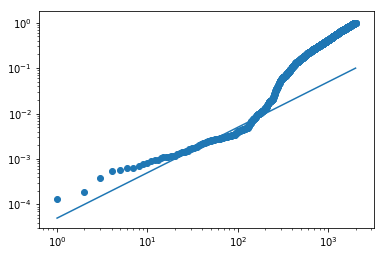

In [104]:

plt.yscale('log')
plt.xscale('log')
n =2000
plt.plot(range(1, n+1), bh[0:n])
plt.scatter(range(1, n+1), pvals_sorted[0:n])

The q-values output by the Benjamini-Hochberg procedure can be interpreted as the smallest FDR threshold at which we
would reject a particular null hypothesis. For instance, a $q$-value of $0.1$ indicates that we can reject the corresponding null hypothesis at
an FDR of $10\%$ or greater, but that we cannot reject the null hypothesis at an FDR below $10\%$.

If we control the FDR at $10\%$, then for how many of the fund managers can we reject $H_{0j}: \mu_j=0$?

In [ ]:
sum(q.values.BH <= .1)

We find that 146 of the 2,000 fund managers have a $q$-value below 0.1; therefore, we are able to conclude that 146 of the fund managers
beat the market at an FDR of $10\%$.  Only about 15 ($10\%$ of 146) of these fund managers are likely to be false discoveries.
By contrast,
if we had instead used Bonferroni's method to control the FWER at level  $\alpha=0.1$, then we would have failed to reject any null hypotheses!